In [1]:
import pandas as pd
import numpy as np

In [2]:
xls = pd.ExcelFile('ex3d1.xlsx')
df = pd.read_excel(xls, 'X', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
df.shape

(5000, 400)

In [4]:
y = pd.read_excel(xls, 'y', header=None)

In [98]:
y.shape

(5000, 1)

In [6]:
def z_calc(X, theta):
    return np.dot(X, theta.T)

In [7]:
def sigmoid(z):
    return 1/(1+ np.exp(-z)) - 0.00001

In [8]:
out_len = 10
m = 5000
l = 3
b1 = np.random.randn(25,)
b2 = np.random.randn(10,)
b = [b1, b2]
def hypothesis(df, theta):
    a = []
    z = []
    for i in range (0, l-1):
        z1 = z_calc(df, theta[i]) + b[i]
        out = sigmoid(z1)
        a.append(out)
        z.append(z1)
        df = out
    return out, a, z

In [9]:
def sigmoid_grad(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [10]:
def randInitializeWeights(Lin, Lout):
    epi = (6**1/2) / (Lin + Lout)**0.5
    w = np.random.rand(Lout, Lin)*(2*epi) -epi
    return w

In [11]:
hidden_layer = 25
output =10
theta1 = randInitializeWeights(len(df.T), hidden_layer)
theta2 = randInitializeWeights(hidden_layer, output)

In [12]:
b1 = np.random.randn(25,)
b2 = np.random.randn(10,)

In [106]:
z1 =z_calc(df, theta1) + b1

In [107]:
a1 = sigmoid(z1)

In [108]:
z2 = z_calc(a1, theta2) + b2

In [109]:
a2 = sigmoid(z2)

In [13]:
theta = [theta1, theta2]

In [14]:
theta1.shape

(25, 400)

In [15]:
theta2.shape

(10, 25)

In [16]:
y_arr = y[0].unique()
y_arr

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [17]:
y1 = np.zeros([len(df), len(y_arr)])
y1 = pd.DataFrame(y1)
for i in range(0, len(y_arr)):
    for j in range(0, len(y1)):
        if y[0][j] == y_arr[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()    

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
del3 = y1-a2

In [113]:
del3.shape

(5000, 10)

In [114]:
del2 = np.dot(del3, theta2) * a1*(1 - a1)

In [117]:
theta1 = np.dot(del2.T, pd.DataFrame(a1)) * 0.005

In [118]:
theta2 = np.dot(del3.T, pd.DataFrame(a2)) * 0.005

In [18]:
def cost_function(y, y_calc, l):
    return (np.sum(np.sum(-np.log(y_calc)*y - np.log(1-y_calc)*(1-y))))/m    

In [19]:
theta = [theta1, theta2]
l=3
m = len(df)
def backpropagation(df, theta, y1, alpha):
    out, a, z = hypothesis(df, theta)
    delta = []
    delta.append(y1-a[-1])
    i = l - 2
    while i > 0:
        delta.append(np.dot(delta[-i], theta[-i])*sigmoid_grad(z[-(i+1)]))
        i -= 1
    theta[0] = np.dot(delta[-1].T, df) * alpha
    for i in range(1, len(theta)):
        theta[i] = np.dot(delta[-(i+1)].T, pd.DataFrame(a[0])) * alpha
    out, a, z = hypothesis(df, theta)
    cost = cost_function(y1, a[-1], 1)
    return theta, cost  

In [53]:
theta1 = randInitializeWeights(len(df.T), hidden_layer)
theta2 = randInitializeWeights(hidden_layer, output)
theta = [theta1, theta2]
cost_list = []
for i in range(400):
    theta, cost= backpropagation(df, theta, y1, 0.005)
    cost_list.append(cost)
cost_list

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[0.9090717197901571,
 103.10558709145835,
 0.0,
 20.120487253610055,
 0.0,
 75.7072692350879,
 0.0,
 86.9879993425234,
 0.0,
 21.549102690434093,
 0.0,
 75.76502099621273,
 0.0,
 86.98829289629242,
 0.0,
 21.54910146000327,
 0.0,
 75.7650209438508,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.549101460003598,
 0.0,
 75.76502094385084,
 0.0,
 86.98829289608229,
 0.0,
 21.5491

In [54]:
out, a, z = hypothesis(df, theta)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [55]:
accuracy= 0
for i in range(0, len(out)):
    for j in range(0, len(out[i])):
        if out[i][j] >= 0.5 and y1.iloc[i, j] == 1:
            accuracy += 1
accuracy/len(df)

0.9

In [56]:
theta1 = randInitializeWeights(len(df.T), hidden_layer)
theta2 = randInitializeWeights(hidden_layer, output)
theta = [theta1, theta2]
cost_list = []
for i in range(500):
    theta, cost= backpropagation(df, theta, y1, 0.001)
    cost_list.append(cost)
cost_list

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


[2.330296195494329,
 20.712615463835967,
 4.88294903949765,
 16.25071720236277,
 5.2244529136630495,
 14.264506504974857,
 8.047803194706107,
 19.00550784533258,
 5.77243072022079,
 17.185101456510996,
 4.528680142075859,
 14.475193258288822,
 8.120424723617898,
 19.02812077832704,
 5.776986422550779,
 17.189088967910642,
 4.534439333025593,
 14.471197274844739,
 8.121446859681635,
 19.03304660817915,
 5.772140008962291,
 17.1912097726881,
 4.54010966284798,
 14.469044891540188,
 8.123627075171163,
 19.04065837332037,
 5.769402563114585,
 17.194948409693247,
 4.547750008738117,
 14.47027970307465,
 8.127378729537247,
 19.052270023596723,
 5.769383159605259,
 17.2004354515147,
 4.557282707681743,
 14.47525889585315,
 8.132682396985553,
 19.06767748912933,
 5.771418081324609,
 17.20690054967579,
 4.567339543224455,
 14.482200567156415,
 8.138385306433516,
 19.083400630783117,
 5.7738724160895165,
 17.21249883210662,
 4.575465045522172,
 14.488219131809197,
 8.142744321333648,
 19.0951163

In [57]:
out, a, z = hypothesis(df, theta)

In [58]:
accuracy= 0
for i in range(0, len(out)):
    for j in range(0, len(out[i])):
        if out[i][j] >= 0.5 and y1.iloc[i, j] == 1:
            accuracy += 1
accuracy/len(df)

0.8

In [65]:
theta1 = randInitializeWeights(len(df.T), hidden_layer)
theta2 = randInitializeWeights(hidden_layer, output)
theta = [theta1, theta2]
cost_list = []
for i in range(300):
    theta, cost= backpropagation(df, theta, y1, 0.005)
    cost_list.append(cost)
cost_list

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[10.197634969471965,
 73.13689694163904,
 11.298947793090024,
 14.582146977077052,
 11.673983043711358,
 77.44906431825966,
 6.103745393949943,
 62.71205482383118,
 16.61588783667229,
 14.703918264261214,
 11.731155341495347,
 77.5015429802519,
 6.10414847774249,
 62.71285122854833,
 16.615917516355953,
 14.703920101025684,
 11.731155482718833,
 77.50154308056726,
 6.104148482605176,
 62.712851238138995,
 16.61591751672536,
 14.703920101047721,
 11.731155482720531,
 77.50154308056841,
 6.104148482605234,
 62.7128512381391,
 16.61591751672536,
 14.703920101047721,
 11.731155482720531,
 77.50154308056841,
 6.104148482605234,
 62.7128512381391,
 16.61591751672536,
 14.703920101047721,
 11.731155482720531,
 77.50154308056841,
 6.104148482605234,
 62.7128512381391,
 16.61591751672536,
 14.703920101047721,
 11.731155482720531,
 77.50154308056841,
 6.104148482605234,
 62.7128512381391,
 16.61591751672536,
 14.703920101047721,
 11.731155482720531,
 77.50154308056841,
 6.104148482605234,
 62.71

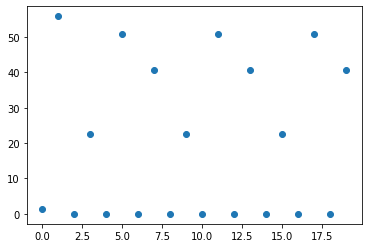

In [96]:
plt.figure()
plt.scatter(range(0, len(cost_list)), cost_list)
plt.show()

In [66]:
out, a, z = hypothesis(df, theta)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [67]:
accuracy= 0
for i in range(0, len(out)):
    for j in range(0, len(out[i])):
        if out[i][j] >= 0.5 and y1.iloc[i, j] == 1:
            accuracy += 1
accuracy/len(df)

0.8

In [89]:
theta1 = randInitializeWeights(len(df.T), hidden_layer)
theta2 = randInitializeWeights(hidden_layer, output)
theta = [theta1, theta2]
cost_list = []
for i in range(20):
    theta, cost= backpropagation(df, theta, y1, 0.003)
    cost_list.append(cost)
cost_list

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[1.276461755678473,
 55.84662579998282,
 0.0,
 22.44119895768736,
 0.0,
 50.753031454338526,
 0.0,
 40.76429743442143,
 0.0,
 22.47867390303841,
 0.0,
 50.82047966093026,
 0.0,
 40.7643298792305,
 0.0,
 22.478673915810116,
 0.0,
 50.82047966090141,
 0.0,
 40.764329879230004]

In [90]:
out, a, z = hypothesis(df, theta)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [91]:
accuracy= 0
for i in range(0, len(out)):
    for j in range(0, len(out[i])):
        if out[i][j] >= 0.5 and y1.iloc[i, j] == 1:
            accuracy += 1
accuracy/len(df)

1.0

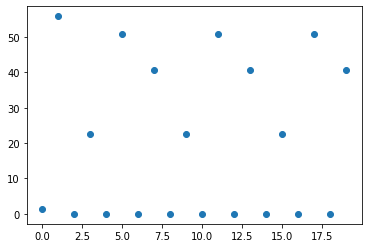

In [95]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(range(0, len(cost_list)), cost_list)
plt.show()